In [946]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install numpy 


In [947]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../data/Airbnb_London/listings.csv'

In [948]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
import matplotlib as mpl
font_path = '../data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

In [949]:
df = pd.read_csv(path)
df = pd.DataFrame(df)

In [950]:
dat = df.copy()

<h3>필요한 컬럼 가져오기(32개) <h3> 

In [951]:
dat.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [952]:
dat['last_scraped']

0        2024-03-21
1        2024-03-20
2        2024-03-20
3        2024-03-20
4        2024-03-21
            ...    
90847    2024-03-19
90848    2024-03-19
90849    2024-03-21
90850    2024-03-20
90851    2024-03-19
Name: last_scraped, Length: 90852, dtype: object

In [953]:
#필요한 컬럼 가져오기 
selected_columns = ['id','listing_url','description','host_id','host_has_profile_pic',
                    'host_identity_verified','host_is_superhost','host_total_listings_count','neighbourhood_cleansed','latitude',
                    'longitude','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','has_availability',
                    'minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_l30d',
                    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value','reviews_per_month']
df = df[selected_columns]

df.head(3)


,id,listing_url,description,host_id,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,...,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,t,t,t,3.0,Hackney,51.52704,...,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,t,t,t,5.0,Islington,51.56861,...,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,t,t,f,1.0,Kensington and Chelsea,51.48780,...,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


<h3>필요한 컬럼명 변경<h3>

컬렴명 변경 

- 'id' : '숙소 id'
- 'listing_url' : '숙소 url'
- 'description' : '숙소상세설명'
- 'host_id' : '호스트 id'
- 'host_is_superhost' : '슈퍼호스트 여부'
- 'host_has_profile_pic' : '프로필사진_소유_여부'
- 'host_identity_verified' : '신원검증_여부'
- 'latitude' : '위도'
- 'longitude' : '경도'
- 'has_availability' : '숙소_예약가능_여부'
- 'host_total_listings_count' : '등록한 총 숙소 수'
- 'neighbourhood_cleansed' : '클린된 숙소 구'
- 'room_type' : '룸 유형'
- 'accommodates' : '수용 인원수'
- 'bathrooms' : '욕실수'
- 'bedrooms' : '침실수'
- 'beds' : '침대수'
- 'amenities' : '어메니티'
- 'price' : '숙소 가격'
- 'minimum_nights' : '최소 숙박일'
- 'maximum_nights' : '최대 숙박일'
- 'number_of_reviews' : '총 리뷰수'
- 'number_of_reviews_l30d' : '한달치 리뷰수'
- 'review_scores_rating' : '리뷰 총점수'
- 'review_scores_accuracy' : '리뷰점수(숙소정보 정확성 )'
- 'review_scores_cleanliness' : '리뷰점수(청결함)'
- 'review_scores_checkin' : '리뷰점수(체크인과정)'
- 'review_scores_communication' : '리뷰점수(호스트와 소통)'
- 'review_scores_location' : '리뷰점수(숙소위치)'
- 'review_scores_value' : '리뷰점수(숙소가격)'
- 'reviews_per_month' : '월별 평균 리뷰수'

In [954]:
#컬럼명 변경 
df = df.rename(columns={
    'id' : '숙소_id',
    'listing_url' : '숙소_url',
    'description' : '숙소_상세설명',
    'host_id' : '호스트_id',
    'host_is_superhost' : '슈퍼호스트',
    'host_total_listings_count' : '숙소_수',
    'host_has_profile_pic' : '프로필사진_소지_여부',
    'host_identity_verified' : '신원_검증_여부',
    'neighbourhood_cleansed' : '숙소_지역',
    'latitude' : '위도',
    'longitude' : '경도',
    'room_type' : '숙소_유형',
    'accommodates' : '수용인원수',
    'bathrooms' : '욕실수',
    'bedrooms' : '침실수',
    'beds' : '침대수',
    'amenities' : '어메니티',
    'price' : '숙소_가격',
    'minimum_nights' : '최소_숙박일',
    'maximum_nights' : '최대_숙박일',
    'minimum_maximum_nights' : '적은_최대_숙박일',
    'maximum_maximum_nights' : '많은_최대_숙박일',
    'has_availability' : '숙소_예약가능_여부',
    'number_of_reviews' : '리뷰수',
    'number_of_reviews_l30d' : '30일_리뷰수',
    'review_scores_rating' : '리뷰점수',
    'review_scores_accuracy' : '숙소_정확성_리뷰점수',
    'review_scores_cleanliness' : '숙소_청결도_리뷰점수',
    'review_scores_checkin' : '숙소_체크인_리뷰점수',
    'review_scores_communication' : '숙소_소통_리뷰점수',
    'review_scores_location' : '숙소_위치_리뷰점수',
    'review_scores_value' : '숙소_가격_리뷰점수',
    'reviews_per_month' : '평균_리뷰수'
})

<h3>주제별 컬럼 분류<h3><br>

숙소/숙박 컬럼 (25개) - 리뷰 컬럼(10개)

In [955]:
#숙소/숙박관련 컬럼

df_lodging = dat[['id', 'listing_url','host_id','host_is_superhost',
                  'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
                  'beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,listing_url,host_id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,t,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [956]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'listing_url' : '숙소_url',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,t,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [957]:
#리뷰관련데이터
df_review = dat[['listing_url','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)

,listing_url,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


In [958]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'listing_url' : '숙소_url',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()

,숙소_url,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54
3,https://www.airbnb.com/rooms/159736,96,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62
4,https://www.airbnb.com/rooms/165336,237,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57


In [959]:
df_lodging.shape


(90852, 15)

In [960]:
df_review.shape


(90852, 11)

In [961]:
df.shape


(90852, 31)

In [962]:
df.columns


Index(['숙소_id', '숙소_url', '숙소_상세설명', '호스트_id', '프로필사진_소지_여부', '신원_검증_여부',
       '슈퍼호스트', '숙소_수', '숙소_지역', '위도', '경도', '숙소_유형', '수용인원수', '욕실수', '침실수',
       '침대수', '어메니티', '숙소_가격', '숙소_예약가능_여부', '최소_숙박일', '최대_숙박일', '리뷰수',
       '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [963]:
df.dtypes


숙소_id            int64
숙소_url          object
숙소_상세설명         object
호스트_id           int64
프로필사진_소지_여부     object
신원_검증_여부        object
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
위도             float64
경도             float64
숙소_유형           object
수용인원수            int64
욕실수            float64
침실수            float64
침대수            float64
어메니티            object
숙소_가격           object
숙소_예약가능_여부      object
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

In [964]:
#중복값 제거 
df.drop_duplicates(inplace=True)

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   숙소_상세설명      87851 non-null  object 
 3   호스트_id       90852 non-null  int64  
 4   프로필사진_소지_여부  90847 non-null  object 
 5   신원_검증_여부     90847 non-null  object 
 6   슈퍼호스트        90463 non-null  object 
 7   숙소_수         90847 non-null  float64
 8   숙소_지역        90852 non-null  object 
 9   위도           90852 non-null  float64
 10  경도           90852 non-null  float64
 11  숙소_유형        90852 non-null  object 
 12  수용인원수        90852 non-null  int64  
 13  욕실수          57894 non-null  float64
 14  침실수          78118 non-null  float64
 15  침대수          57837 non-null  float64
 16  어메니티         90852 non-null  object 
 17  숙소_가격        57885 non-null  object 
 18  숙소_예약가능_여부   86773 non-null  object 
 19  최소_숙

<h3>결측치 개수</h3><br>

- 슈퍼호스트 389개
- 문의_응답률 33,055개
- 숙소_수 5개
- 욕실수 32,958개
- 침실수 12,734개
- 침대수 33,015개 
- 숙소_가격 32,967개
- 리뷰점수 24,983개
- 숙소_정확성_리뷰점수 25014개
- 숙소_청결도_리뷰점수 25009개
- 숙소_체크인_리뷰점수 25044개
- 숙소_소통_리뷰점수 25019개
- 숙소_위치_리뷰점수 25044개
- 숙소_가격_리뷰점수 25046개 
- 평균_리뷰수 24983개

- -----------------------------------------

- 숙소_상세설명 3,001개
- 프로필사진_소지_여부 5개
- 신원_검증_여부 5개 
- 숙소_예약가능_여부 4079개

<h3>슈퍼호스트 결측치 처리</h3>

- 슈퍼호스트가 null값인 데이터 삭제 389개임(5%이하 해당)



In [966]:
df['슈퍼호스트'].isna().sum()

389

In [967]:
df = df.dropna(subset=['슈퍼호스트'])

In [968]:
df.shape

(90463, 31)

<h3>숙소수 결측치 처리</h3>

- 숙소수가 null값인 데이터 삭제 5개임(5%이하 해당)

In [969]:
df = df.dropna(subset=['숙소_수'])

In [970]:
df.shape


(90458, 31)

In [971]:
df['숙소_지역'].unique()

array(['Hackney', 'Islington', 'Kensington and Chelsea', 'Lambeth',
       'Brent', 'Southwark', 'Westminster', 'Wandsworth', 'Tower Hamlets',
       'Richmond upon Thames', 'Newham', 'Camden', 'Haringey', 'Enfield',
       'Hammersmith and Fulham', 'Waltham Forest', 'Barnet', 'Hounslow',
       'Barking and Dagenham', 'Croydon', 'Lewisham', 'Ealing', 'Merton',
       'City of London', 'Havering', 'Greenwich', 'Hillingdon', 'Bromley',
       'Redbridge', 'Harrow', 'Bexley', 'Kingston upon Thames', 'Sutton'],
      dtype=object)

<h3>리뷰수 결측치 처리</h3>

In [972]:
df[df['리뷰수'] == 0]

,숙소_id,숙소_url,숙소_상세설명,호스트_id,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,숙소_수,숙소_지역,위도,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
9,170524,https://www.airbnb.com/rooms/170524,NaN,194769,t,t,f,9.0,Westminster,51.506120,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,318986,https://www.airbnb.com/rooms/318986,NaN,1637212,t,t,f,1.0,Kensington and Chelsea,51.491130,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,42692,https://www.airbnb.com/rooms/42692,Holland Park/Notting Hill. Guests have access ...,186510,t,t,f,1.0,Hammersmith and Fulham,51.508220,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,44384,https://www.airbnb.com/rooms/44384,A stunning double room with great views.<br />...,194769,t,t,f,9.0,Barnet,51.597900,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,324055,https://www.airbnb.com/rooms/324055,NaN,1664001,t,f,f,1.0,Newham,51.553110,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90847,1115272743905612628,https://www.airbnb.com/rooms/1115272743905612628,A place to spread out in with extra wiggle roo...,565833376,t,t,f,55.0,Bexley,51.502721,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90848,1115272767893608505,https://www.airbnb.com/rooms/1115272767893608505,"Two-storey living, unwind downstairs and rest ...",565833376,t,t,f,55.0,Bexley,51.504134,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90849,1115285644506865913,https://www.airbnb.com/rooms/1115285644506865913,The Chapter Hotels group had been in the hotel...,444801189,t,t,f,44.0,Westminster,51.506404,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90850,1115338006572763275,https://www.airbnb.com/rooms/1115338006572763275,This bright and spacious three-bedroom penthou...,514234035,t,t,f,62.0,Westminster,51.513649,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [973]:
df = df[df['리뷰수'] != 0]

In [974]:
df.shape

(65538, 31)

<h3>리뷰분야 (6개)결측치 처리</h3>
'숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'

In [975]:
df.columns

Index(['숙소_id', '숙소_url', '숙소_상세설명', '호스트_id', '프로필사진_소지_여부', '신원_검증_여부',
       '슈퍼호스트', '숙소_수', '숙소_지역', '위도', '경도', '숙소_유형', '수용인원수', '욕실수', '침실수',
       '침대수', '어메니티', '숙소_가격', '숙소_예약가능_여부', '최소_숙박일', '최대_숙박일', '리뷰수',
       '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [976]:
df[df['리뷰수'] == 0 ].count()

숙소_id          0
숙소_url         0
숙소_상세설명        0
호스트_id         0
프로필사진_소지_여부    0
신원_검증_여부       0
슈퍼호스트          0
숙소_수           0
숙소_지역          0
위도             0
경도             0
숙소_유형          0
수용인원수          0
욕실수            0
침실수            0
침대수            0
어메니티           0
숙소_가격          0
숙소_예약가능_여부     0
최소_숙박일         0
최대_숙박일         0
리뷰수            0
30일_리뷰수        0
리뷰점수           0
숙소_정확성_리뷰점수    0
숙소_청결도_리뷰점수    0
숙소_체크인_리뷰점수    0
숙소_소통_리뷰점수     0
숙소_위치_리뷰점수     0
숙소_가격_리뷰점수     0
평균_리뷰수         0
dtype: int64

In [977]:
df['숙소_정확성_리뷰점수'].isna().sum()

31

6개분야의 리뷰점수가 전부 널값 제거

In [978]:
review_field = df['숙소_정확성_리뷰점수'].isna() & df['숙소_청결도_리뷰점수'].isna() & df['숙소_체크인_리뷰점수'].isna() & df['숙소_소통_리뷰점수'].isna() \
   & df['숙소_위치_리뷰점수'].isna() &df['숙소_가격_리뷰점수'].isna()

In [979]:
df = df[~review_field]

In [980]:
df.shape

(65516, 31)

In [981]:
#각 분야의 널값
df['숙소_정확성_리뷰점수'].isna().sum() # 9개
df['숙소_청결도_리뷰점수'].isna().sum() # 4개
df['숙소_소통_리뷰점수'].isna().sum() # 14개
df['숙소_위치_리뷰점수'].isna().sum() # 39개
df['숙소_가격_리뷰점수'].isna().sum() # 41개 

41

<h3>숙소유형 특징 </h3>

- Entire home/apt 
- Private room (호스텔)
- Hotel room
- Shared room (게스트하우스느낌)

In [982]:
df['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [983]:
from scipy.stats import chisquare
from scipy import stats
import scipy as sp 

import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

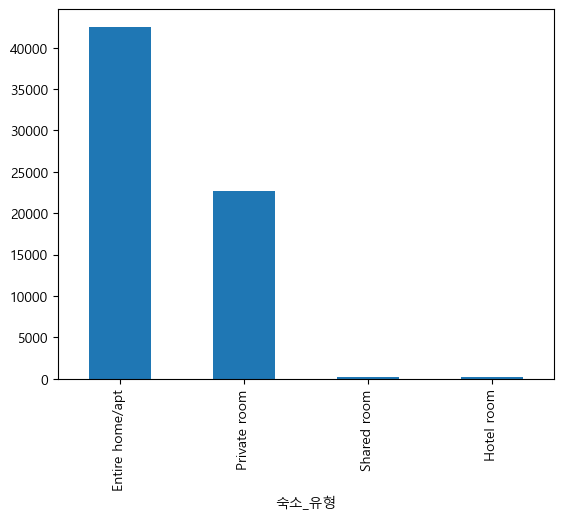

In [984]:
df['숙소_유형'].value_counts().plot(kind='bar')
plt.show()

<h3>숙소지역 특징 </h3>

1. Hackney(해크니): <span style="color:yellow">동런던</span>에 위치한 트렌디한 지역 / <span style="color:yellow">예술가와 창의적</span>인 커뮤니티가 많이 거주

2. Islington(이슬링턴): <span style="color:yellow">중북부</span>에 위치 / <span style="color:yellow">고급 주거 지역</span> (고풍스러운 타운하우스와 다양한 음식점, 극장)

3. Kensington and Chelsea(켄싱턴 앤드 첼시): <span style="color:yellow">서쪽</span>에 위치 / <span style="color:yellow">가장 부유한 지역</span> (고급 부티크와 박물관, 아름다운 주택)

4. Lambeth(램버스): <span style="color:yellow">남쪽</span>위치한 지역 / 런던 아이와 사우스뱅크 센터 같은 <span style="color:yellow">주요 관광지</span> (다양하고 활기찬 커뮤니티)

5. Brent(브렌트): <span style="color:yellow">북서쪽</span>위치 / <span style="color:yellow">스포츠와 음악 이벤트</span> (웸블리 스타디움이 있는 곳)

6. Southwark(사우스워크): <span style="color:yellow">남동쪽</span> 위치 /   <span style="color:yellow">문화 관광 거리</span> (테이트 모던 미술관과 버러 마켓이 유명)

7. Westminster(웨스트민스터): <span style="color:yellow">중심부</span>위치 / <span style="color:yellow">정부 기관 지역</span> (국회의사당, 버킹엄 궁전, 트라팔가 광장)

8. Wandsworth(원스워스):<span style="color:yellow">남서쪽</span>위치 / 
<span style="color:yellow">주거 지역</span> (큰 공원과 가족 친화적인 분위기가 특징)

9. Tower Hamlets(타워햄리츠): <span style="color:yellow">동쪽</span> 위치 / 런던 타워와 카나리 워프 같은 <span style="color:yellow">역사적이고 상업적인 중심지</span>

10. Richmond upon Thames(리치먼드): <span style="color:yellow">남서쪽</span>에 위치 / <span style="color:yellow">풍요롭고 피크닉 장소</span> (리치몬드 공원과 템스 강이 유명)

11. Newham(뉴험): <span style="color:yellow">동쪽</span>에 위치 / <span style="color:yellow">다문화 지역</span> (올림픽 공원과 웨스트필드 쇼핑센터)

12. Camden(캠던): <span style="color:yellow">북부</span>에 위치 / <span style="color:yellow">보헤미안 지역</span> (캠든 마켓과 음악 공연장이 많음)

13. Haringey(하린지): <span style="color:yellow">북쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (알렉산드라 팰리스와 큰 공원)

14. Enfield(엔필드): <span style="color:yellow">북쪽 외곽</span>에 위치 / <span style="color:yellow">자연적인 지역</span> (넓은 녹지와 가족 친화적인 분위기가 특징)

15. Hammersmith and Fulham(해머스미스 앤드 풀럼): <span style="color:yellow">서쪽</span>에 위치 / <span style="color:yellow">국제 기업의 사무소 지역</span> (템스 강변의 아름다운 경치와 고급 주택들)

16. Waltham Forest(월섬 포레스트): <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">녹지와 공원 지역</span> (예술과 문화적 활동이 활발한 곳)

17. Barnet(바넷): <span style="color:yellow">북서쪽</span>에 위치 / <span style="color:yellow">큰 주거 지역</span> (가족과 함께 살기 좋은 환경을 제공)

18. Hounslow(하운슬로): <span style="color:yellow">서쪽 외곽</span>에 위치 / <span style="color:yellow">히드로 공항과 가까운</span>특징 (교통이 편리)

19. Barking and Dagenham(바킹 앤드 다게넘): <span style="color:yellow">동쪽 외곽</span>에 위치 / <span style="color:yellow">공업 지대와 주거 지역이 혼재</span> 다문화 지역

20. Croydon(크로이던): <span style="color:yellow">남쪽</span>에 위치 / <span style="color:yellow">큰 상업 중심지</span> (쇼핑몰과 비즈니스 허브가 많음)

21. Lewisham(루이섬): <span style="color:yellow">남동쪽</span>에 위치 / <span style="color:yellow">다양한 문화적 배경을 가진 사람들이 거주</span> (활기찬 시장이 있다)

22. Ealing(일링): <span style="color:yellow">서쪽</span>에 위치 / <span style="color:yellow">가족 친화적인 분위기</span> (철도역이 있고 큰 공원)

23. Merton(머튼): <span style="color:yellow">남서쪽</span>에 위치 / <span style="color:yellow">윔블던 테니스 챔피언십이 열리는 윔블던이 있음</span> 

24. City of London: <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">런던의 금융 중심지</span> (고층 건물과 역사적인 랜드마크가 혼재)

25. Greenwich(그리니치): <span style="color:yellow">남동쪽</span>에 위치 / <span style="color:yellow">그리니치 천문대 유명</span> (해양 박물관이 유명, 관광지)

26. Hillingdon(힐링던): <span style="color:yellow">서쪽 외곽</span>에 위치 / <span style="color:yellow">히드로 공항이 있다.</span>

27. Bromley(브롬리): <span style="color:yellow">남동쪽 외곽</span>에 위치 / <span style="color:yellow"> 큰 주거 지역</span> (녹지가 많고 가족들이 많이 거주)

28. Havering(해버링): <span style="color:yellow">동쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역 느낌</span> 평온하고 넓은 녹지가 있다.

29. Harrow(해로): <span style="color:yellow">북서쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (좋은 교육 시설이 많음)

30. Bexley(벡슬리): <span style="color:yellow">남동쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역</span> 가족 친화적인 분위기와 공원이 많습니다.

31. Redbridge(레드브리지): <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (다양한 커뮤니티와 녹지가 있다)

32. Kingston upon Thames(킹스턴): <span style="color:yellow">남서쪽</span>에 위치 / <span style="color:yellow">쇼핑 지역이 유명</span> (템스 강변의 아름다운 경치)

33. Sutton(서턴): <span style="color:yellow">남쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역</span> (가족들이 살기 좋은 환경을 제공)

In [985]:
df['숙소_지역'].unique() # 33개 

array(['Hackney', 'Islington', 'Kensington and Chelsea', 'Lambeth',
       'Brent', 'Southwark', 'Westminster', 'Wandsworth', 'Tower Hamlets',
       'Richmond upon Thames', 'Newham', 'Camden', 'Haringey', 'Enfield',
       'Hammersmith and Fulham', 'Waltham Forest', 'Barnet', 'Hounslow',
       'Barking and Dagenham', 'Croydon', 'Lewisham', 'Ealing', 'Merton',
       'City of London', 'Greenwich', 'Hillingdon', 'Bromley', 'Havering',
       'Harrow', 'Bexley', 'Redbridge', 'Kingston upon Thames', 'Sutton'],
      dtype=object)

In [986]:
df['숙소_지역']

0                       Hackney
1                     Islington
2        Kensington and Chelsea
3                       Lambeth
4        Kensington and Chelsea
                  ...          
90451                   Lambeth
90568                 Islington
90590                    Camden
90648                  Lewisham
90735                   Hackney
Name: 숙소_지역, Length: 65516, dtype: object

<h3>숙소_가격 결측치 처리 </h3>

- 숙소_가격이 선정되는 기준 --> 숙소지역과 숙소유형별로 비교분석 시도 

숙소가격 데이터타입 >> float로 변경 

In [987]:
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace('$', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace(',', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.strip()

In [988]:
df['숙소_가격']

0        160.00
1         65.00
2        120.00
3         65.00
4        100.00
          ...  
90451     46.00
90568     78.00
90590    136.00
90648    109.00
90735     41.00
Name: 숙소_가격, Length: 65516, dtype: object

In [989]:
df['숙소_가격'] = df.loc[:,'숙소_가격'].astype(float)

In [990]:
df['숙소_가격'].dtypes

dtype('float64')

In [991]:
df['숙소_가격'].describe()

count    43446.000000
mean       165.145307
std        419.950280
min          0.000000
25%         70.000000
50%        120.000000
75%        195.000000
max      53588.000000
Name: 숙소_가격, dtype: float64

In [992]:
dat = df.copy()

숙소가격 널값 제거 후 분석

In [993]:
df["숙소_가격"].isna().sum()


22070

In [994]:
df.dropna(subset=['숙소_가격'], inplace =  True)

In [995]:
df.shape

(43446, 31)

<h3>숙소 유형과 숙소가격 연관성 분석</h3>

In [996]:
df.숙소_유형.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

ANOVA 분석 (범주형데이터와 연속형데이터 비교)

- 독립성 
- 정규성
- 등분산성 

범주형데이터 - 숙소지역 (33개) / 숙소유형(4개)<br>
연속형데이터 - 숙소가격

In [997]:
from scipy.stats import levene

# 숙소 유형별로 숙소 가격 데이터를 추출
prices_by_type = [df[df['숙소_유형'] == typ]['숙소_가격'].values for typ in df['숙소_유형'].unique()]

# 등분산성 검정 수행
statistic, p_value = levene(*prices_by_type)

# 결과 출력
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

# p-value를 기준으로 등분산성 여부 판단
if p_value > 0.05:
    print("등분산성을 만족합니다.")
else:
    print("등분산성을 만족하지 않습니다.")

Levene's test statistic: 65.00667521682823
p-value: 6.23641484714332e-42
등분산성을 만족하지 않습니다.


In [998]:
mean = df['숙소_가격'].values

mean1 = df[df['숙소_유형'] == 'Entire home/apt'].숙소_가격.values
mean2 = df[df['숙소_유형'] == 'Private room'].숙소_가격.values
mean3 = df[df['숙소_유형'] == 'Hotel room'].숙소_가격.values
mean4 = df[df['숙소_유형'] == 'Shared room'].숙소_가격.values

In [999]:

import pandas as pd
import scipy.stats as stats

# ANOVA 분석 수행
anova_result = stats.f_oneway(mean1, mean2, mean3, mean4)

print('ANOVA 결과 :', anova_result)

# p-value가 유의수준(일반적으로 0.05)보다 작은지 확인
if anova_result.pvalue < 0.05:
    print('숙소 유형별로 숙소 가격에 유의미한 차이가 있습니다.')
else:
    print('숙소 유형별로 숙소 가격에 유의미한 차이가 없습니다.')

ANOVA 결과 : F_onewayResult(statistic=299.8908443847532, pvalue=1.0210599539625403e-192)
숙소 유형별로 숙소 가격에 유의미한 차이가 있습니다.


<h4>귀무가설 : 두 그룹의 평균이 동일하다</h4>
mean1 과 mean3는 귀무가설 채택 pvalue=0.0927190882997952 (0.05보다 큼)<br>
entire home/apt 와 hotel room은 reject가 false 이기때문에 <br>
두 그룹의 평균이 동일하다라고 판단

In [1000]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd



# Tukey's HSD 검정 수행
tukey_result = pairwise_tukeyhsd(df['숙소_가격'], df['숙소_유형'])

# 결과 출력
print(tukey_result)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1        group2     meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------
Entire home/apt   Hotel room    9.1447 0.9961  -96.2711 114.5605  False
Entire home/apt Private room -127.0289    0.0 -137.9257 -116.132   True
Entire home/apt  Shared room   -77.052  0.088  -161.453   7.3489  False
     Hotel room Private room -136.1735 0.0051 -241.7762 -30.5709   True
     Hotel room  Shared room  -86.1967 0.3542 -220.9435  48.5501  False
   Private room  Shared room   49.9768 0.4272  -34.6574  134.611  False
-----------------------------------------------------------------------


pvalue=1.0210599539625403e-192 (0.05보다 작으므로 귀무가설 기각)<br>
귀무가설 : 숙소가격과 숙소유형간의 평균차이가 없다 >> 기각<br>
결론 >> 숙소가격과 숙소유형간의 평균차이가 있음 .

<h3>숙소유형과 숙소지역간의 연관성 분석 </h3><br>
범주형데이터끼리의 독립성 확인 >> 카이제곱검정 <br>



In [1001]:
from scipy.stats import chi2_contingency



# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['숙소_유형'], df['숙소_지역']))

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square value: 2694.801564124822
p-value: 0.0
Degrees of freedom: 96
Expected frequencies table:
[[2.11838144e+02 7.54011393e+02 1.95950283e+02 9.49299682e+02
  2.95249413e+02 2.01246237e+03 1.96612277e+02 5.29595360e+02
  7.63279312e+02 3.09813285e+02 6.56698246e+02 1.69073319e+03
  1.29155068e+03 7.05685817e+02 2.07866179e+02 1.64836556e+02
  3.27687129e+02 4.38902154e+02 1.30942453e+03 2.12301540e+03
  2.34345947e+02 1.43983738e+03 7.55997376e+02 4.57437992e+02
  7.65927289e+02 2.82671523e+02 4.50818050e+02 1.47558507e+03
  1.36370805e+02 2.08395774e+03 5.65343047e+02 1.38687785e+03
  3.59131853e+03]
 [7.58642913e-01 2.70029462e+00 7.01744695e-01 3.39966855e+00
  1.05735856e+00 7.20710767e+00 7.04115454e-01 1.89660728e+00
  2.73348525e+00 1.10951526e+00 2.35179303e+00 6.05491875e+00
  4.62535101e+00 2.52722920e+00 7.44418358e-01 5.90319017e-01
  1.17352576e+00 1.57181329e+00 4.68936151e+00 7.60302444e+00
  8.39248723e-01 5.15640105e+00 2.70740690e+00 1.63819454e+00
  2.74296828e+

의문점<br>
숙소유형별로 숙소가격의 평균차이를 알 필요가 없음 <br>
boxplot으로 숙소가격의 이상치 여부와 제거할 필요가 있음<br>

In [1002]:
avg_price_by_area_type = round(df.groupby(['숙소_지역', '숙소_유형'])['숙소_가격'].mean(),1).reset_index()

avg_price_by_area_type

,숙소_지역,숙소_유형,숙소_가격
0,Barking and Dagenham,Entire home/apt,136.5
1,Barking and Dagenham,Private room,61.7
2,Barking and Dagenham,Shared room,70.0
3,Barnet,Entire home/apt,151.6
4,Barnet,Private room,65.9
...,...,...,...
103,Wandsworth,Shared room,66.7
104,Westminster,Entire home/apt,280.3
105,Westminster,Hotel room,423.4
106,Westminster,Private room,134.2


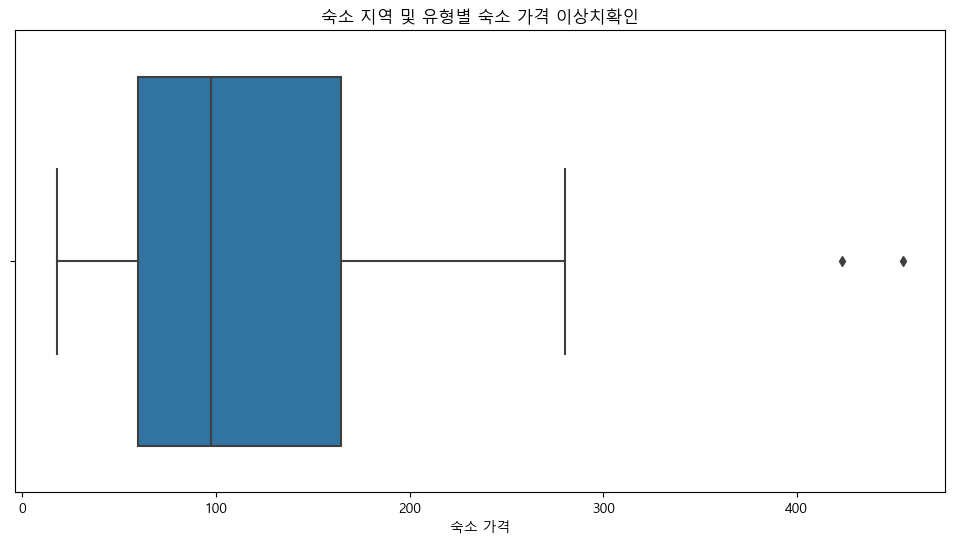

In [1003]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숙소 지역과 숙소 유형별 가격의 평균 계산
avg_price_by_area_type = df.groupby(['숙소_지역', '숙소_유형'])['숙소_가격'].mean().reset_index()

# 상자수염 그림(boxplot)으로 이상치 확인
plt.figure(figsize=(12, 6))
sns.boxplot(data=avg_price_by_area_type, x='숙소_가격')
plt.title('숙소 지역 및 유형별 숙소 가격 이상치확인')
plt.xlabel('숙소 가격')
plt.show()

In [1004]:
avg_price_by_area_type.describe()

,숙소_가격
count,108.000000
mean,121.951096
std,79.052092
min,18.000000
25%,59.833038
50%,97.625458
75%,164.361121
max,454.666667


In [1005]:
import pandas as pd

# 숙소 지역과 숙소 유형별 가격의 평균 계산
avg_price_by_area_type = df.groupby(['숙소_지역', '숙소_유형'])['숙소_가격'].mean().reset_index()

# 각 그룹에서 이상치를 식별
outliers = []
for group, data in avg_price_by_area_type.groupby(['숙소_지역', '숙소_유형']):
    q1 = data['숙소_가격'].quantile(0.25)
    q3 = data['숙소_가격'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # 이상치 식별 및 저장
    outliers.extend(data[(data['숙소_가격'] < lower_bound) | (data['숙소_가격'] > upper_bound)].index)

# 이상치 출력
print("이상치 인덱스:", outliers)


이상치 인덱스: []


In [1006]:
# 이상치의 개수
num_outliers = len(outliers)

# 결과 출력
print("이상치의 개수:", num_outliers)

이상치의 개수: 0


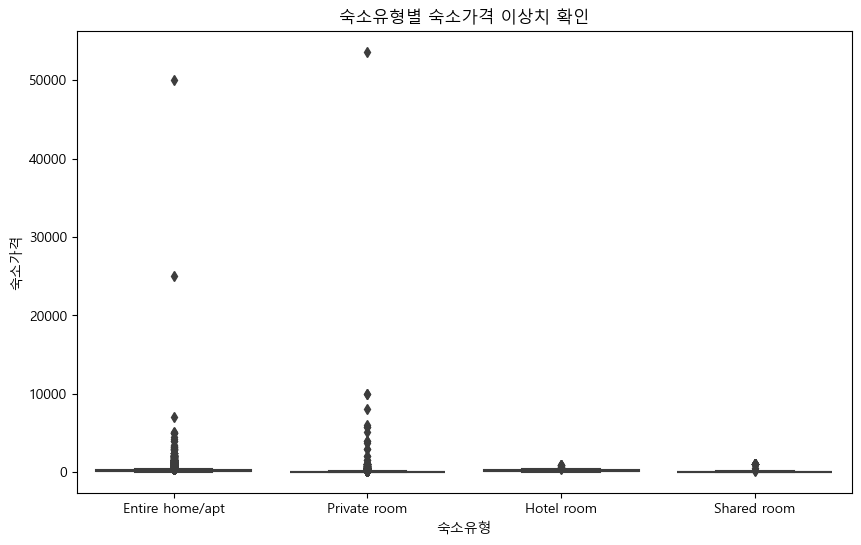

In [1007]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숙소 유형별로 숙소 가격의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='숙소_유형', y='숙소_가격')
plt.title('숙소유형별 숙소가격 이상치 확인')
plt.xlabel('숙소유형')
plt.ylabel('숙소가격')
plt.show()

In [1008]:
import pandas as pd
import numpy as np

# 이상치 제거 함수 정의
def remove_outliers(df):
    London_lodging_type = pd.DataFrame()
    for room_type in df['숙소_유형'].unique():
        # 각 숙소 유형별 가격 데이터 추출
        prices = df[df['숙소_유형'] == room_type]['숙소_가격']
        # 이상치 경계 계산
        Q1 = np.percentile(prices, 25)
        Q3 = np.percentile(prices, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 이상치 제거
        outliers_removed = prices[(prices >= lower_bound) & (prices <= upper_bound)]
        # 이상치가 제거된 데이터를 새로운 데이터프레임에 추가
        London_lodging_type = pd.concat([London_lodging_type, pd.DataFrame({'숙소_유형': room_type, '숙소_가격': outliers_removed})])
    return London_lodging_type

# 이상치 제거 함수 호출
London_lodging_type = remove_outliers(df)

# 이상치 제거 후 결과 확인
print(London_lodging_type)

                 숙소_유형  숙소_가격
0      Entire home/apt  160.0
2      Entire home/apt  120.0
4      Entire home/apt  100.0
10     Entire home/apt  137.0
14     Entire home/apt  112.0
...                ...    ...
84622      Shared room   20.0
86052      Shared room   34.0
86741      Shared room   24.0
87509      Shared room   45.0
88536      Shared room   24.0

[40685 rows x 2 columns]


In [1009]:
# 이상치 제거 전 데이터프레임의 크기
original_size = len(df)

# 이상치 제거 후 데이터프레임의 크기
cleaned_size = len(London_lodging_type)

# 이상치 값의 개수 계산
outliers_removed_count = original_size - cleaned_size
print(original_size)
print(cleaned_size)

print("이상치 값의 개수:", outliers_removed_count)

43446
40685
이상치 값의 개수: 2761


In [1010]:
#숙소유형별 숙소_가격 이상치 제거한 데이터
London_lodging_type

,숙소_유형,숙소_가격
0,Entire home/apt,160.0
2,Entire home/apt,120.0
4,Entire home/apt,100.0
10,Entire home/apt,137.0
14,Entire home/apt,112.0
...,...,...
84622,Shared room,20.0
86052,Shared room,34.0
86741,Shared room,24.0
87509,Shared room,45.0


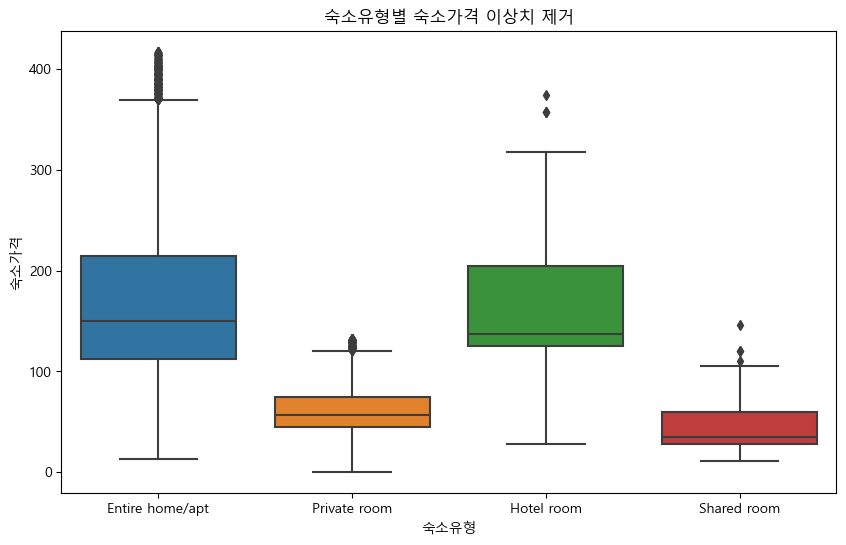

In [1011]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숙소 유형별로 숙소 가격의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=London_lodging_type, x='숙소_유형', y='숙소_가격')
plt.title('숙소유형별 숙소가격 이상치 제거')
plt.xlabel('숙소유형')
plt.ylabel('숙소가격')
plt.show()

In [1012]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    28761
Private room       14421
Shared room          161
Hotel room           103
Name: count, dtype: int64

In [1013]:
London_lodging_type['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    26925
Private room       13524
Shared room          143
Hotel room            93
Name: count, dtype: int64

In [1014]:
# 각 유형별 가격의 평균 
avg_price_by_type = round(London_lodging_type.groupby('숙소_유형')['숙소_가격'].mean(),1).reset_index()

# 결과 출력
print(avg_price_by_type)

             숙소_유형  숙소_가격
0  Entire home/apt  171.9
1       Hotel room  163.2
2     Private room   61.4
3      Shared room   46.4


In [1015]:
London_type = df['숙소_유형']

London_Entire_home = df[df['숙소_유형'] == 'Entire home/apt']
London_Private_room = df[df['숙소_유형'] == 'Private room']
London_Hotel_room = df[df['숙소_유형'] == 'Hotel room']
London_Shared_room = df[df['숙소_유형'] == 'Shared room']


<h3>숙소 지역과 숙소가격 이상치 제거</h3>


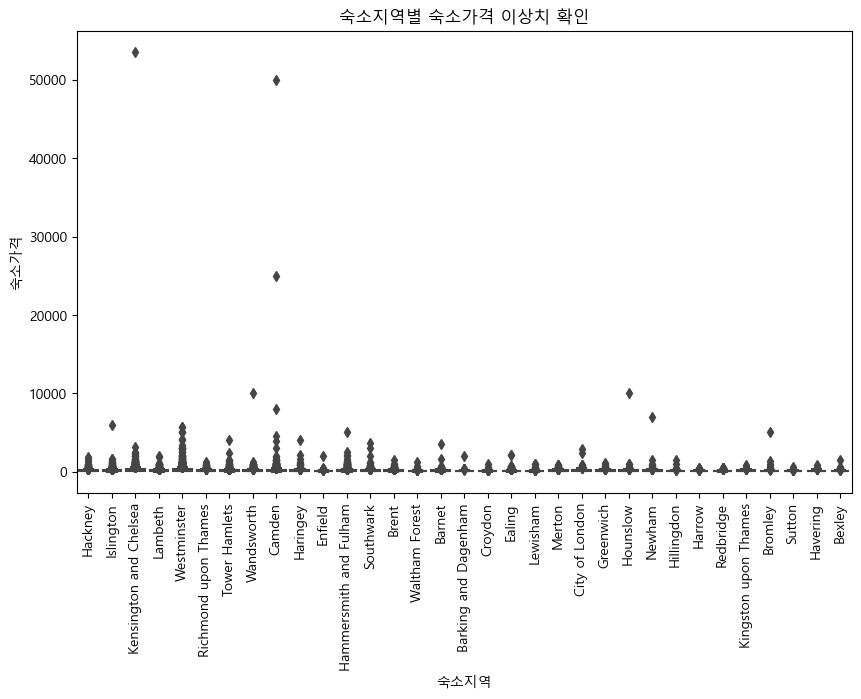

In [1016]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숙소 유형별로 숙소 가격의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='숙소_지역', y='숙소_가격')
plt.title('숙소지역별 숙소가격 이상치 확인')
plt.xlabel('숙소지역')
plt.ylabel('숙소가격')
plt.xticks(rotation=90)
plt.show()

In [1017]:
import pandas as pd
import numpy as np

# 이상치 제거 함수 정의
def remove_outliers(df):
    London_lodging_area = pd.DataFrame()
    for room_area in df['숙소_지역'].unique():
        # 각 숙소 유형별 가격 데이터 추출
        prices = df[df['숙소_지역'] == room_area]['숙소_가격']
        # 이상치 경계 계산
        Q1 = np.percentile(prices, 25)
        Q3 = np.percentile(prices, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 이상치 제거
        outliers_removed = prices[(prices >= lower_bound) & (prices <= upper_bound)]
        # 이상치가 제거된 데이터를 새로운 데이터프레임에 추가
        London_lodging_area = pd.concat([London_lodging_area, pd.DataFrame({'숙소_지역': room_area, '숙소_가격': outliers_removed})])
    return London_lodging_area

# 이상치 제거 함수 호출
London_lodging_area = remove_outliers(df)

# 이상치 제거 후 결과 확인
print(London_lodging_area)

         숙소_지역  숙소_가격
0      Hackney  160.0
10     Hackney  137.0
16     Hackney  145.0
75     Hackney  200.0
121    Hackney  250.0
...        ...    ...
85888   Bexley  106.0
85957   Bexley   28.0
87010   Bexley  129.0
88386   Bexley   40.0
89602   Bexley   30.0

[41119 rows x 2 columns]


In [1018]:
# 이상치 제거 전 데이터프레임의 크기
original_size = len(df)

# 이상치 제거 후 데이터프레임의 크기
cleaned_size = len(London_lodging_area)

# 이상치 값의 개수 계산
outliers_removed_count = original_size - cleaned_size
print(original_size)
print(cleaned_size)

print("이상치 값의 개수:", outliers_removed_count)

43446
41119
이상치 값의 개수: 2327


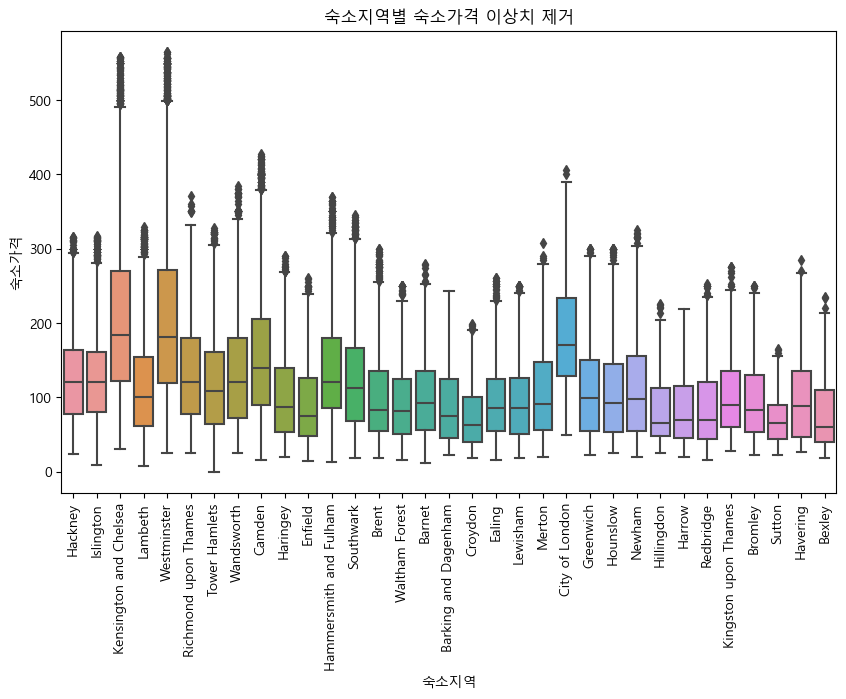

In [1019]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숙소 유형별로 숙소 가격의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=London_lodging_area, x='숙소_지역', y='숙소_가격')
plt.title('숙소지역별 숙소가격 이상치 제거')
plt.xlabel('숙소지역')
plt.ylabel('숙소가격')
plt.xticks(rotation=90)

plt.show()

In [1020]:
# 각 지역별 가격의 평균 
avg_price_by_area = round(London_lodging_area.groupby('숙소_지역')['숙소_가격'].mean(),1).reset_index()

# 결과 출력
print(avg_price_by_area)

                     숙소_지역  숙소_가격
0     Barking and Dagenham   88.4
1                   Barnet  102.6
2                   Bexley   79.2
3                    Brent  102.8
4                  Bromley   95.0
5                   Camden  158.6
6           City of London  182.8
7                  Croydon   73.6
8                   Ealing   96.5
9                  Enfield   90.9
10               Greenwich  108.6
11                 Hackney  127.0
12  Hammersmith and Fulham  139.4
13                Haringey  102.9
14                  Harrow   83.8
15                Havering   99.9
16              Hillingdon   83.3
17                Hounslow  109.0
18               Islington  128.2
19  Kensington and Chelsea  207.6
20    Kingston upon Thames  102.3
21                 Lambeth  118.6
22                Lewisham   94.4
23                  Merton  106.5
24                  Newham  114.0
25               Redbridge   88.7
26    Richmond upon Thames  136.5
27               Southwark  126.9
28            

In [1021]:
df['숙소_지역'].unique()

array(['Hackney', 'Islington', 'Kensington and Chelsea', 'Lambeth',
       'Westminster', 'Richmond upon Thames', 'Tower Hamlets',
       'Wandsworth', 'Camden', 'Haringey', 'Enfield',
       'Hammersmith and Fulham', 'Southwark', 'Brent', 'Waltham Forest',
       'Barnet', 'Barking and Dagenham', 'Croydon', 'Ealing', 'Lewisham',
       'Merton', 'City of London', 'Greenwich', 'Hounslow', 'Newham',
       'Hillingdon', 'Harrow', 'Redbridge', 'Kingston upon Thames',
       'Bromley', 'Sutton', 'Havering', 'Bexley'], dtype=object)

In [1022]:
mean = df['숙소_가격'].values

mean1 = df[df['숙소_유형'] == 'Entire home/apt'].숙소_가격
mean2 = df[df['숙소_유형'] == 'Private room'].숙소_가격
mean3 = df[df['숙소_유형'] == 'Hotel room'].숙소_가격
mean4 = df[df['숙소_유형'] == 'Shared room'].숙소_가격

- Chi-square value (카이제곱 값)이 크면 실제로 기대빈도와 관찰된 빈도 간에 유의미한 차이가 있다는 뜻 
- p-value 0.05보다 작으므로 통계적으로 유의미한 관련성이 있다. 
- Degrees of freedom (자유도) : 96개의 독립적인 정보를 조작할수 있다 . 자유도가 높을수록 검정 통계량이 더욱 정확하게 측정된다. 96으로 높으므로 결과의 신뢰도가 높음

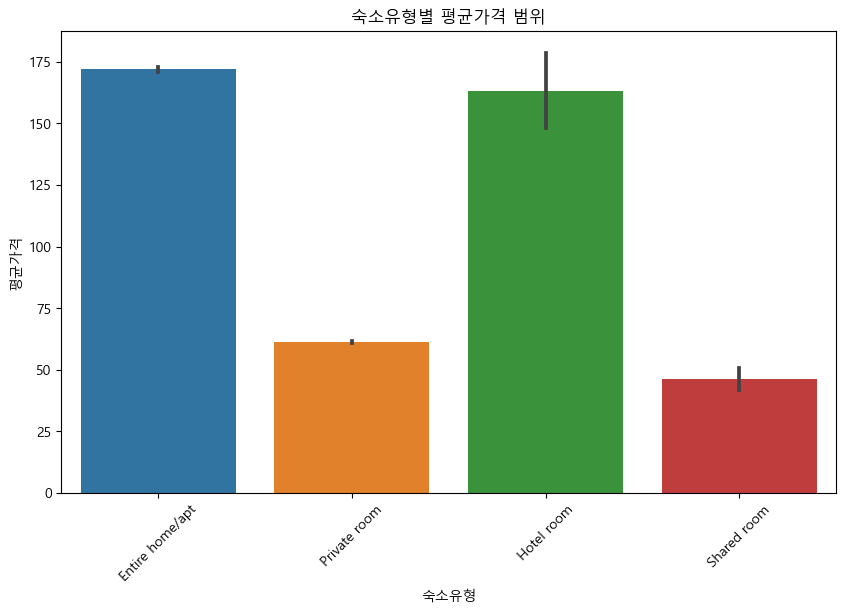

In [1023]:
# 막대 그래프 그리기

import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.barplot(data=London_lodging_type, x='숙소_유형', y='숙소_가격')
plt.title('숙소유형별 평균가격 범위')
plt.xlabel('숙소유형')
plt.ylabel('평균가격')
plt.xticks(rotation=45)
plt.show()

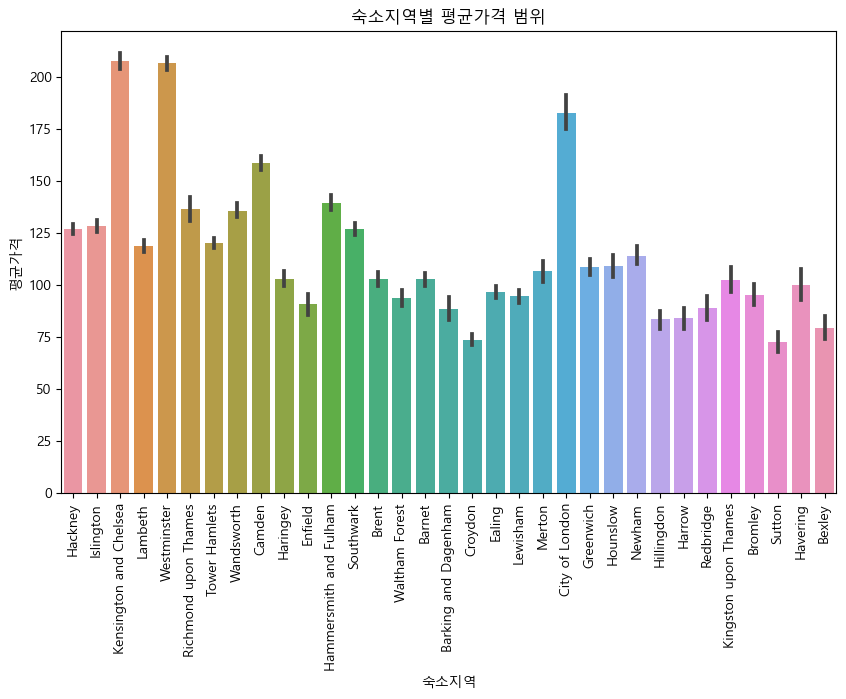

In [1024]:
# 막대 그래프 그리기

import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.barplot(data=London_lodging_area, x='숙소_지역', y='숙소_가격')
plt.title('숙소지역별 평균가격 범위')
plt.xlabel('숙소지역')
plt.ylabel('평균가격')
plt.xticks(rotation=90)
plt.show()

<h3>숙소가격 결측치 처리 </h3>

In [1025]:
#리뷰수가 0 인 값 / 숙소수 null 값 / 슈퍼호스트 null 값 제거한 데이터
#(숙소 유형. 지역 별 숙소가격의 이상치값 제거는 원본 df값에 반영 안함)
#단지 숙소가격 결측치 처리를 위해 실행한 것 
dat.shape

(65516, 31)

In [1026]:
avg_price_by_type

,숙소_유형,숙소_가격
0,Entire home/apt,171.9
1,Hotel room,163.2
2,Private room,61.4
3,Shared room,46.4


In [1027]:
avg_price_by_area

,숙소_지역,숙소_가격
0,Barking and Dagenham,88.4
1,Barnet,102.6
2,Bexley,79.2
3,Brent,102.8
4,Bromley,95.0
5,Camden,158.6
6,City of London,182.8
7,Croydon,73.6
8,Ealing,96.5
9,Enfield,90.9


In [1028]:
avg_price_by_area_type

,숙소_지역,숙소_유형,숙소_가격
0,Barking and Dagenham,Entire home/apt,136.515152
1,Barking and Dagenham,Private room,61.662338
2,Barking and Dagenham,Shared room,70.000000
3,Barnet,Entire home/apt,151.645638
4,Barnet,Private room,65.859740
...,...,...,...
103,Wandsworth,Shared room,66.666667
104,Westminster,Entire home/apt,280.312100
105,Westminster,Hotel room,423.440000
106,Westminster,Private room,134.220220


In [1029]:
London_Price_Nan = dat[dat['숙소_가격'].isna()]

In [1030]:
dat['숙소_가격'].isna().sum()

22070

원본 숙소지역과 숙소유형 별 숙소 가격의 평균 --> (가격이 nan값인 데이터)의 숙소지역과 숙소유형 별 숙소 가격에 반영

In [1031]:
# London_Price_Nan의 숙소 지역과 숙소 유형의 컬럼값이 avg_price_by_area_type의 숙소 지역과 숙소 유형과 같은 조건을 충족하는 경우
for index, row in London_Price_Nan.iterrows():
    condition = (avg_price_by_area_type['숙소_지역'] == row['숙소_지역']) & (avg_price_by_area_type['숙소_유형'] == row['숙소_유형'])
    # 조건을 충족하는 경우 London_Price_Nan의 숙소 가격 값에 avg_price_by_area_type의 조건에 맞는 숙소 가격 값을 대입
    if condition.any():
        avg_price = avg_price_by_area_type.loc[condition, '숙소_가격'].values[0]
        London_Price_Nan.at[index, '숙소_가격'] = avg_price

# 결과 확인
print(London_Price_Nan)

                     숙소_id                                            숙소_url  \
5                   313710               https://www.airbnb.com/rooms/313710   
6                   168359               https://www.airbnb.com/rooms/168359   
8                    24328                https://www.airbnb.com/rooms/24328   
11                  170702               https://www.airbnb.com/rooms/170702   
13                  314985               https://www.airbnb.com/rooms/314985   
...                    ...                                               ...   
87029  1089297954935898261  https://www.airbnb.com/rooms/1089297954935898261   
87276  1090640057985958105  https://www.airbnb.com/rooms/1090640057985958105   
87290  1090452783507963913  https://www.airbnb.com/rooms/1090452783507963913   
87300  1090481573621124067  https://www.airbnb.com/rooms/1090481573621124067   
88004  1095441435477010989  https://www.airbnb.com/rooms/1095441435477010989   

                                       

In [1032]:
London_Price_Nan['숙소_가격'].isna().sum()

12

대체후에도 결측치 12개가 나옴<br>
이유는 각 해당 지역에 4개의숙소_유형이 다 있는게 아니였음 <br> 

In [1033]:
London_Price_Nan[London_Price_Nan['숙소_가격'].isna()][['숙소_지역','숙소_유형']]

,숙소_지역,숙소_유형
1090,Islington,Shared room
8790,Islington,Shared room
18641,Islington,Shared room
20890,Barnet,Hotel room
21230,Islington,Hotel room
25508,Islington,Hotel room
27366,Islington,Hotel room
27367,Islington,Hotel room
27372,Islington,Hotel room
27433,Islington,Hotel room


In [1034]:
#원본 데이터에는 Islington 지역의 숙소유형이 2가지밖에 없었다.
avg_price_by_area_type[avg_price_by_area_type['숙소_지역']=='Islington']


,숙소_지역,숙소_유형,숙소_가격
58,Islington,Entire home/apt,184.11456
59,Islington,Private room,91.93440


In [1035]:
avg_price_by_area_type[avg_price_by_area_type['숙소_지역']=='Barnet']

,숙소_지역,숙소_유형,숙소_가격
3,Barnet,Entire home/apt,151.645638
4,Barnet,Private room,65.859740
5,Barnet,Shared room,18.000000


In [1036]:
avg_price_by_area_type[avg_price_by_area_type['숙소_지역']=='Lambeth']


,숙소_지역,숙소_유형,숙소_가격
66,Lambeth,Entire home/apt,184.679718
67,Lambeth,Private room,76.445312
68,Lambeth,Shared room,59.000000


결측치 12개를 숙소 유형별 평균가격으로 대체 

In [1037]:
avg_price_by_type

,숙소_유형,숙소_가격
0,Entire home/apt,171.9
1,Hotel room,163.2
2,Private room,61.4
3,Shared room,46.4


In [1038]:
# London_Price_Nan의 숙소 지역과 숙소 유형의 컬럼값이 avg_price_by_area_type의 숙소 지역과 숙소 유형과 같은 조건을 충족하는 경우
for index, row in London_Price_Nan.iterrows():
    condition = (avg_price_by_area_type['숙소_유형'] == row['숙소_유형'])
    # 조건을 충족하는 경우 London_Price_Nan의 숙소 가격 값에 avg_price_by_area_type의 조건에 맞는 숙소 가격 값을 대입
    if condition.any():
        avg_price = avg_price_by_area_type.loc[condition, '숙소_가격'].values[0]
        London_Price_Nan.at[index, '숙소_가격'] = avg_price

# 결과 확인
print(London_Price_Nan)

                     숙소_id                                            숙소_url  \
5                   313710               https://www.airbnb.com/rooms/313710   
6                   168359               https://www.airbnb.com/rooms/168359   
8                    24328                https://www.airbnb.com/rooms/24328   
11                  170702               https://www.airbnb.com/rooms/170702   
13                  314985               https://www.airbnb.com/rooms/314985   
...                    ...                                               ...   
87029  1089297954935898261  https://www.airbnb.com/rooms/1089297954935898261   
87276  1090640057985958105  https://www.airbnb.com/rooms/1090640057985958105   
87290  1090452783507963913  https://www.airbnb.com/rooms/1090452783507963913   
87300  1090481573621124067  https://www.airbnb.com/rooms/1090481573621124067   
88004  1095441435477010989  https://www.airbnb.com/rooms/1095441435477010989   

                                       

In [1039]:
London_Price_Nan['숙소_가격'].isna().sum()

0

In [1040]:
dat.loc[London_Price_Nan.index, '숙소_가격'] = London_Price_Nan['숙소_가격']

In [1041]:
dat['숙소_가격'].isna().sum()

0

결측치 다 제거 

In [1042]:
# df = df.dropna(subset=['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', 
#                     '숙소_소통_리뷰점수', '숙소_위치_리뷰점수','숙소_가격_리뷰점수','리뷰수','숙소_가격',
#                     '숙소_수'])

In [1043]:

# df['숙소_유형'].unique()

In [1044]:
# import pandas as pd 

# lodging_type = {
#     'Entire home/apt': 1,
#     'Private room': 2,
#     'Hotel room': 3,
#     'Shared room': 4
# }

# df["숙소_유형"] = df["숙소_유형"].replace(lodging_type)
# df['숙소_유형']

In [1045]:
# df = df.dropna(subset=['숙소_가격'])


In [1046]:
# df['숙소_가격'].isna().sum()

In [1047]:
# df['숙소_가격']

In [1048]:
# df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace('$', "")
# df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace(',', "")
# df.loc[:,'숙소_가격'] = df['숙소_가격'].str.strip()



In [1049]:
df['숙소_가격']

0        160.0
1         65.0
2        120.0
3         65.0
4        100.0
         ...  
90451     46.0
90568     78.0
90590    136.0
90648    109.0
90735     41.0
Name: 숙소_가격, Length: 43446, dtype: float64

In [1050]:
# df['숙소_가격'] = df.loc[:,'숙소_가격'].astype(float)


In [1051]:
# df['숙소_가격']

In [1052]:
# df.groupby("숙소_지역")[["숙소_유형"]].value_counts()

In [1053]:
# import numpy as np
# import pandas as pd

# columns_to_scale = ['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', 
#                     '숙소_소통_리뷰점수', '숙소_위치_리뷰점수','숙소_가격_리뷰점수','리뷰수','숙소_가격',
#                     '숙소_수','숙소_유형']

# df[columns_to_scale]

In [1054]:
# df_source = df[columns_to_scale]

In [1055]:
# cov_df_source = df_source.corr(method='pearson')

In [1056]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# # 데이터프레임의 상관관계 계산
# corr = df_source.corr()

# # 마스크 생성 (상단 삼각형)
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # 히트맵 그리기
# plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
# plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
# plt.show()